# EDA & Modelling

In [1]:
random_state = 42

## Package loading

In [2]:
from modules.ezs_func import *
from modules.ezs_model import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


## Project name

In [3]:
name = 'iris'

# Exploratory Data Analysis 

## Thresholds & other parameters

In [4]:
problem_type = 'classification'

In [5]:
data_size = 'small'

In [6]:
threshold_NaN = 0.5

In [7]:
threshold_cat = 5

In [8]:
threshold_Z = 3.0

In [9]:
test_size = 0.33

In [10]:
threshold_entropy = 0.75

In [11]:
undersampling = False

In [12]:
undersampler = 'Random'

In [13]:
threshold_corr = 1.0

In [14]:
threshold_model = 5

In [15]:
threshold_score = 0.7

In [16]:
threshold_feature = 5

In [17]:
CPU = False

In [18]:
time_dep = False

In [19]:
date_idx = 0

In [20]:
lag_number = 3

In [21]:
level_1_model = 'regression'

## File & target

In [22]:
path = '/home/fifi/Documents/ezstacking/dataset/iris.csv'

In [23]:
df = pd.read_csv(path)

In [24]:
target_col = 'variety'

### Deployment

In [25]:
FastAPI_port = 8000

In [26]:
Docker_port = 80

# Drop user's columns & Duplicates:

In [27]:
user_drop_cols = []

Dataset before deletion

In [28]:
display(df)

sepal_length  sepal_width  petal_length  petal_width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

In [29]:
df = df.drop(user_drop_cols, axis=1)

Duplicate rows:

In [30]:
df = duplicates(df)

Number of rows before removing: 150
Number of duplicate rows: 1
Number of rows after removing: 149


Dataset after deletion of user’s columns and duplicates

In [31]:
display(df)

sepal_length  sepal_width  petal_length  petal_width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[149 rows x 5 columns]

### Dataset copy

In [32]:
df_copy = df.copy()

# Dataset Information

### Dataframe structure

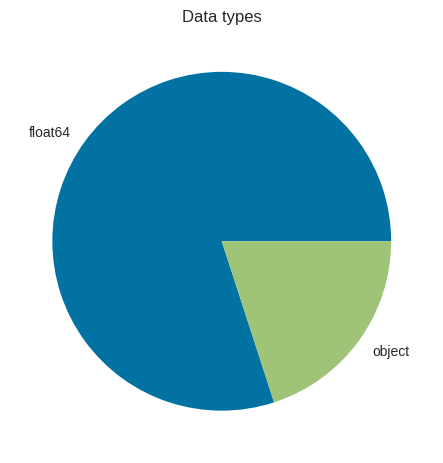

In [33]:
plot_dataframe_structure(df)

### Dataframe statistics

In [34]:
display(df.describe().T)

count      mean       std  min  25%  50%  75%  max
sepal_length  149.0  5.843624  0.830851  4.3  5.1  5.8  6.4  7.9
sepal_width   149.0  3.059732  0.436342  2.0  2.8  3.0  3.3  4.4
petal_length  149.0  3.748993  1.767791  1.0  1.6  4.3  5.1  6.9
petal_width   149.0  1.194631  0.762622  0.1  0.3  1.3  1.8  2.5

### Which columns could be categorical ?

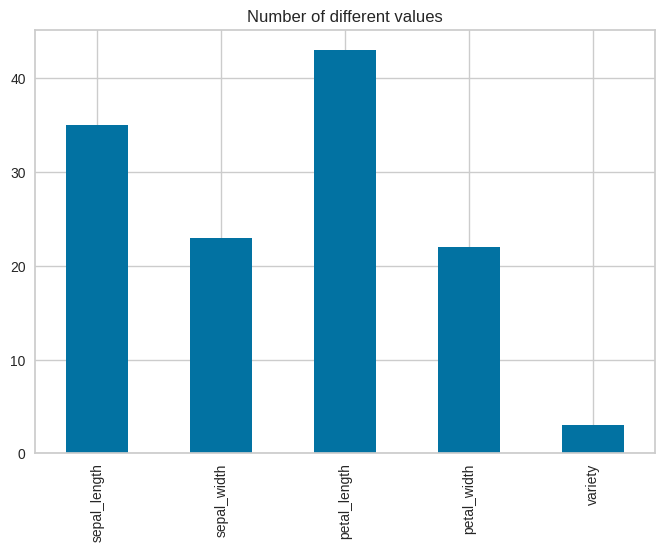

In [35]:
plot_categorical(df)

# Dataset Cleaning

### Drop NaN:

In [36]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [37]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [38]:
display(dropped_cols)

array([], dtype=float64)

### Encoding data:

In [39]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: sepal_length
Encoding numeric column: sepal_width
Encoding numeric column: petal_length
Encoding numeric column: petal_width
Encoding object column: variety


### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


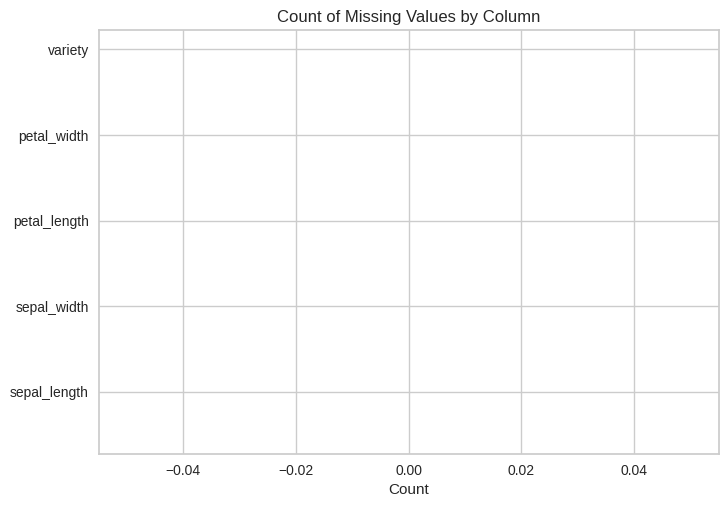

In [40]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

#### Imputation

In [41]:
df = imputation(df)

No need to impute data.


### Data compression:

In [42]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.01MB
Memory usage after optimization is: 0.00MB
Decreased by 61.4%


#### Dataframe structure after compression

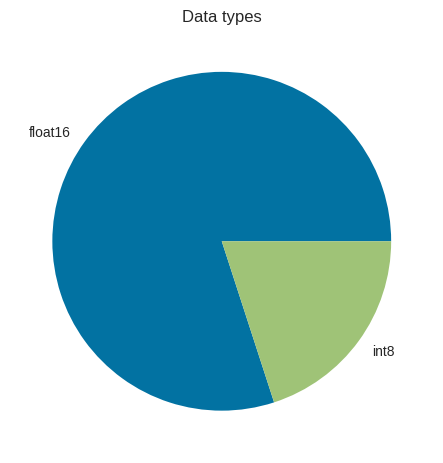

In [43]:
plot_dataframe_structure(df)

### Outliers:

In [44]:
df = outliers(df, threshold_Z)

Using Z_score,  1  rows will be suppressed.


# Plottings

# Ranking 

#### Ranking 1D 

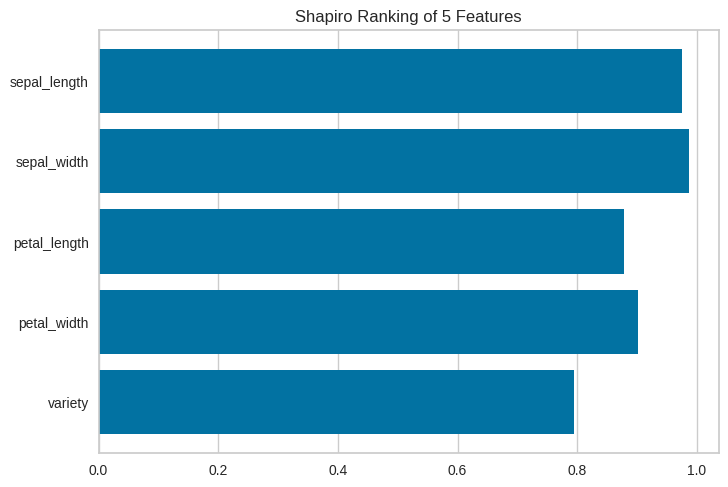

In [45]:
rank1d(df);

#### Ranking 2D 

##### Ranking 2D according to Pearson

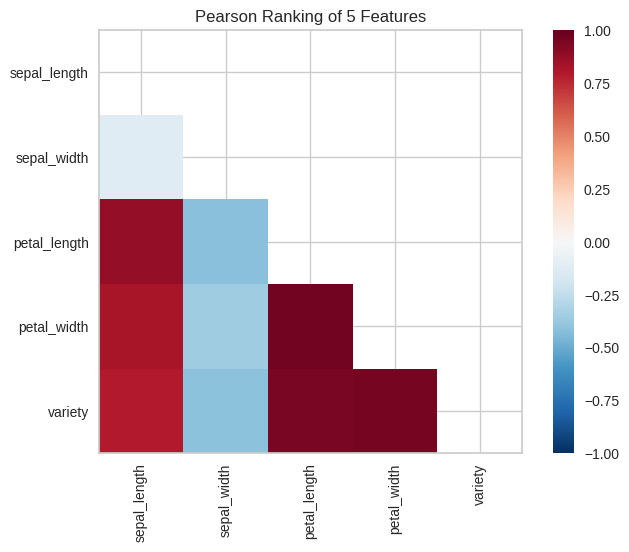

In [46]:
rank2d(df, algorithm='pearson');

##### Ranking 2D based on covariance

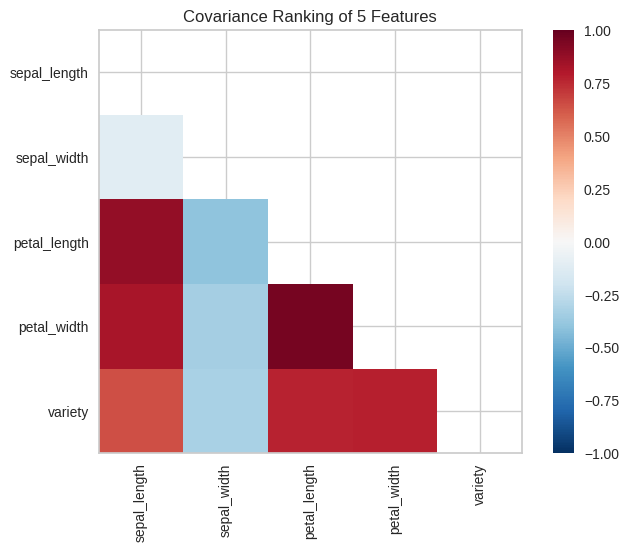

In [47]:
rank2d(df, algorithm='covariance');

##### Ranking 2D according to Spearman

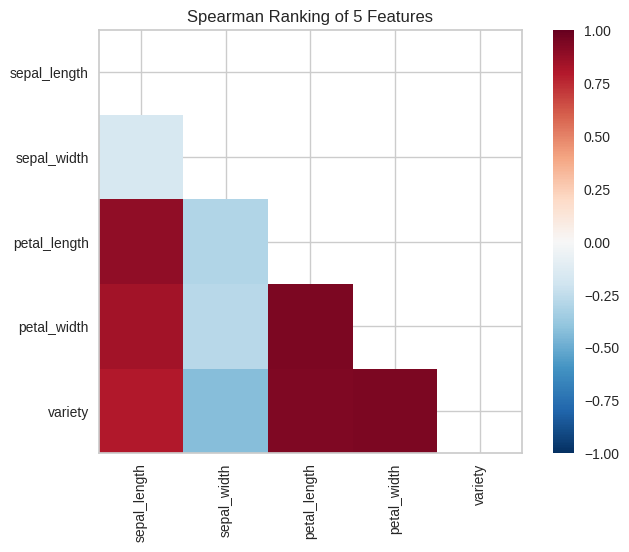

In [48]:
rank2d(df, algorithm='spearman');

##### Ranking 2D according to Kendalltau

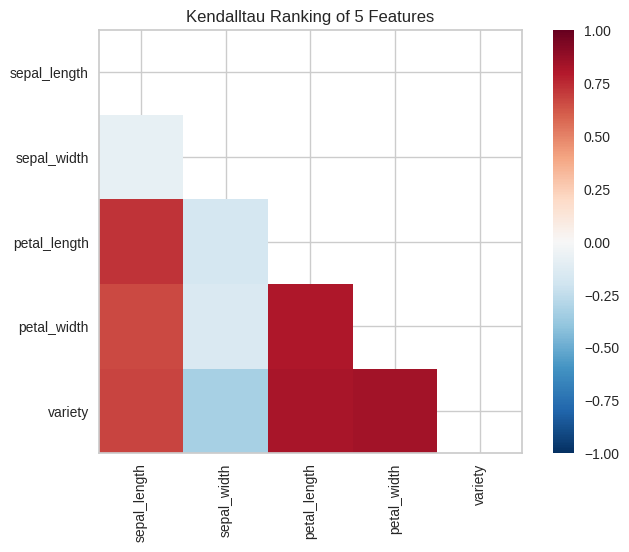

In [49]:
rank2d(df, algorithm='kendalltau');

# Correlation according to Pearson

In [50]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [51]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

### Check columns that should be dropped

In [52]:
print(dropped_cols)

[]


# Correlation according to Spearman (hierarchical clustering)

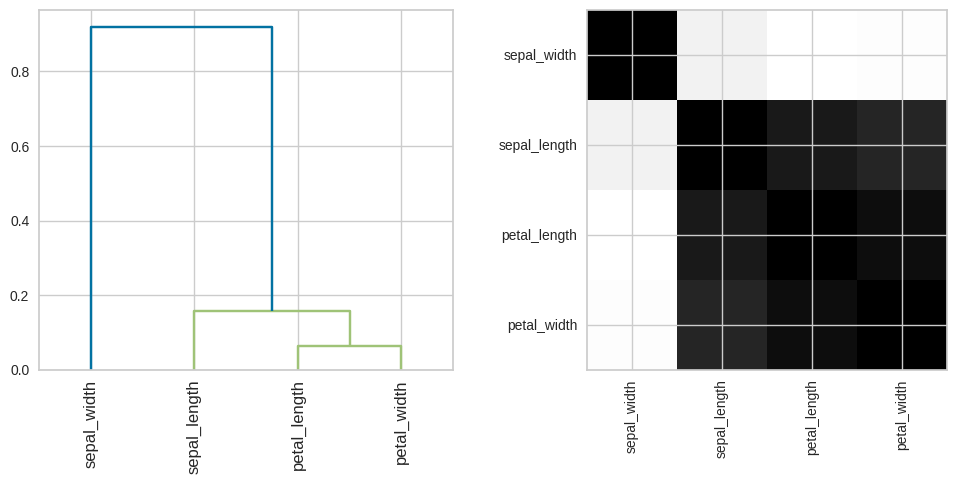

In [53]:
hierarchical_clustering(df.drop(target_col, axis=1))

#### Splitting dataframe in features and targets

In [54]:
y = df[target_col]

In [55]:
X = df.drop(target_col, axis=1)

##### Correlation with Yellow Bricks

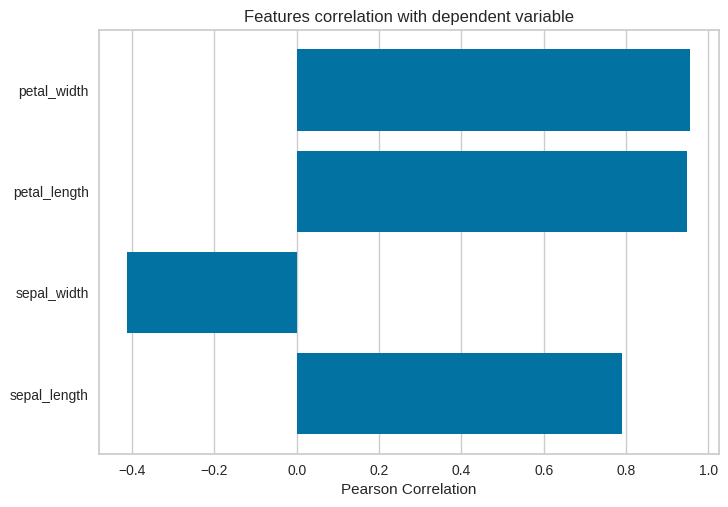

In [56]:
feature_correlation(X, y);

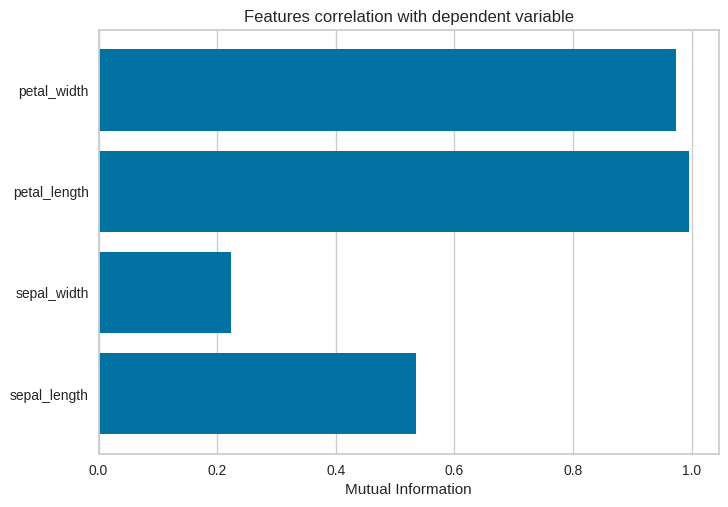

In [57]:
feature_correlation(X, y, method='mutual_info-classification');

# PCA

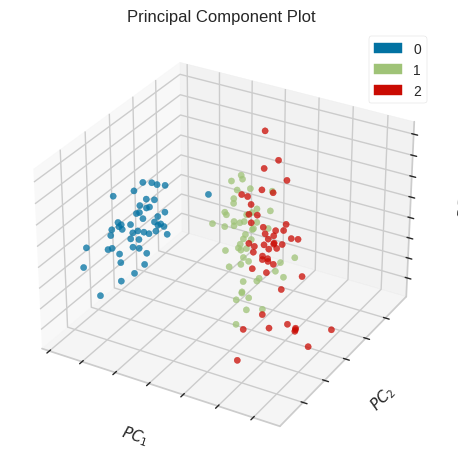

In [58]:
pca_decomposition(X, y.astype(int), projection=3);

# Class balancing

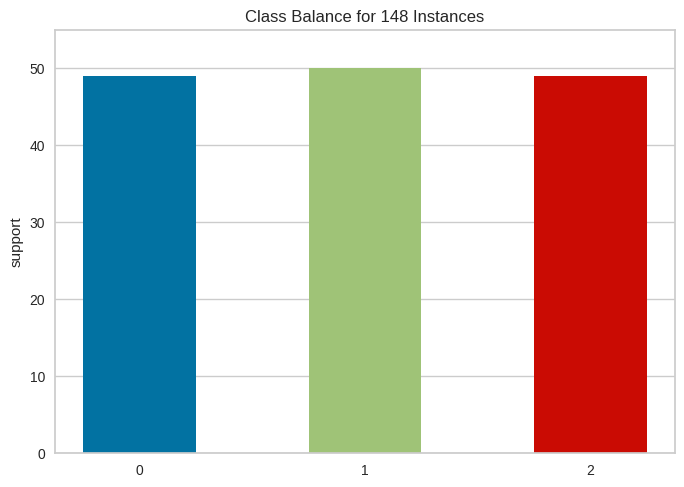

Entropy =  0.9999585368071042


In [59]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

# Splittings 

In [60]:
df = df_copy

## Splitting dataframe in features and targets

In [61]:
y = df[target_col]

In [62]:
X = df.drop(target_col, axis=1)

## Dimensions

In [63]:
nb_features = len(X.columns.tolist())

In [64]:
nb_targets = len(y.unique())

In [65]:
layer_size = nb_features + nb_targets + 2

## Splitting data in train and test sets 

In [66]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler, random_state = random_state)

## Encoding

In [67]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

# Modelling

## Model building

### Pipeline building

#### Select the categorical and numerical columns

In [68]:
cat_selector = make_column_selector(dtype_include=object)

In [69]:
num_selector = make_column_selector(dtype_include=np.number)

#### For models based on tree

In [70]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [71]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True))

In [72]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

#### For models not based on tree

In [73]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [74]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler())

In [75]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

#### Level-0 models

In [76]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPCQ', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('DTCG', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='gini', random_state = random_state))), 
          ('DTCE', make_pipeline(tree_preprocessor, DecisionTreeClassifier(criterion='entropy', random_state = random_state))), 
          ('SGDCH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='hinge', penalty='elasticnet', random_state = random_state))), 
          ('SGDCLL', make_pipeline(ntree_preprocessor, SGDClassifier(loss='log_loss', penalty='elasticnet', random_state = random_state))), 
          ('SGDCMH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='modified_huber', penalty='elasticnet', random_state = random_state))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, random_state = random_state))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2', random_state = random_state))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2', random_state = random_state))), 
          ('MLPC1', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, ), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('MLPC2', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, layer_size,), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ]

#### Level-1 model

In [77]:
level_1 = LogisticRegression(random_state = random_state)

#### Stacking for classification

In [78]:
model = StackingClassifier(level_0, final_estimator=level_1, n_jobs=-1)

# Model fitting

In [79]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anacon

CPU times: user 361 ms, sys: 221 ms, total: 581 ms
Wall time: 14.6 s


StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('iterativeimputer',
                                                                                                                    IterativeImputer(add_indicator=True,
                                                                                                                                     random_state=42)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f353...
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                                                   ('onehotencoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse_output=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f353c6af310>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=1.0))])),
                                                ('gaussiannb',
                                                 GaussianNB())]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

# Model evaluation

### Model scoring

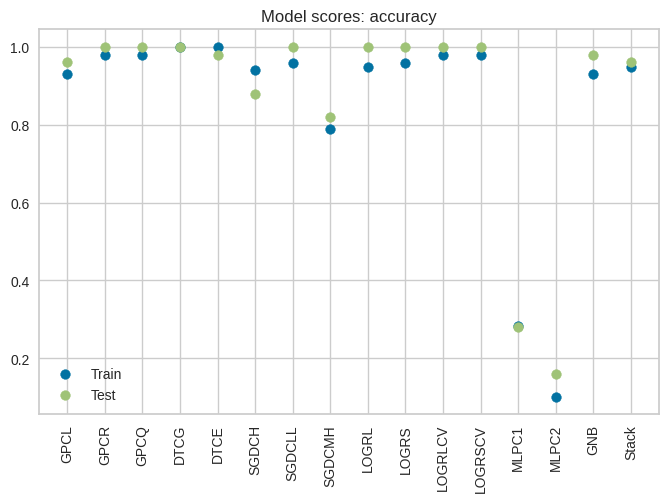

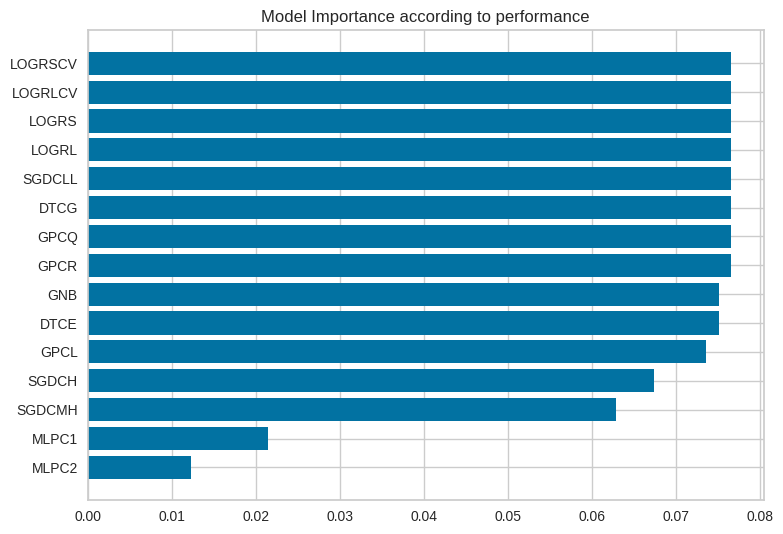

In [80]:
score_stack_0, mod_imp_score_0 = score_stacking(model, X_train, y_train, X_test, y_test)

### ROC/AUC

In [81]:
classes = y.unique()

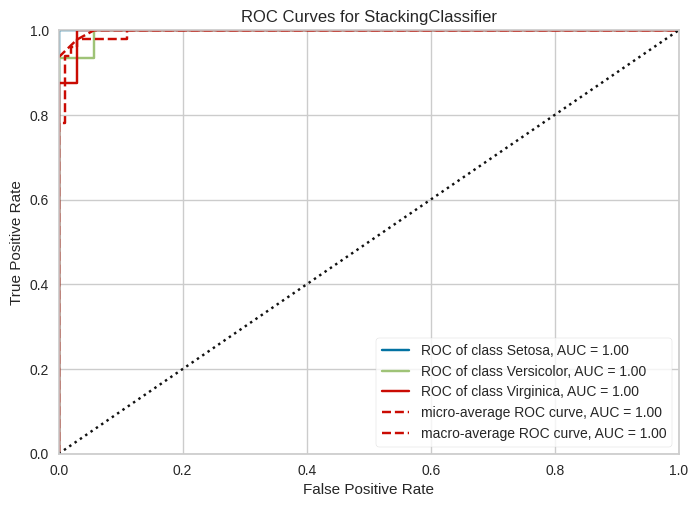

In [82]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

### Classification report

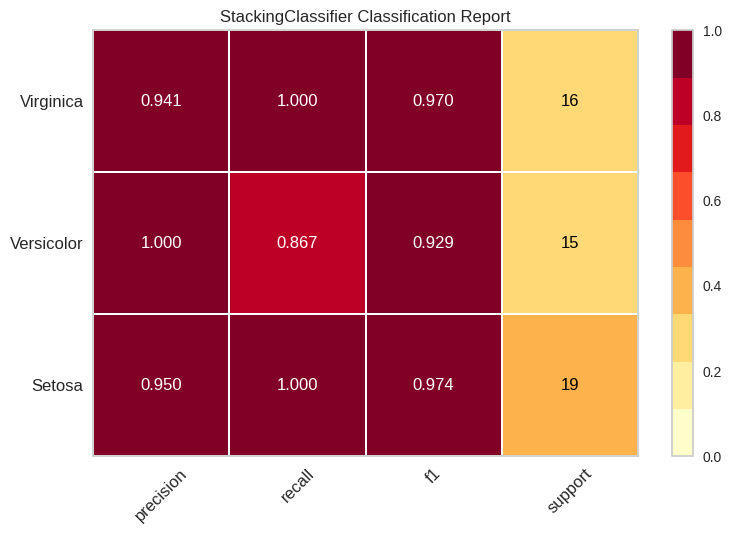

In [83]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

### Confusion matrix

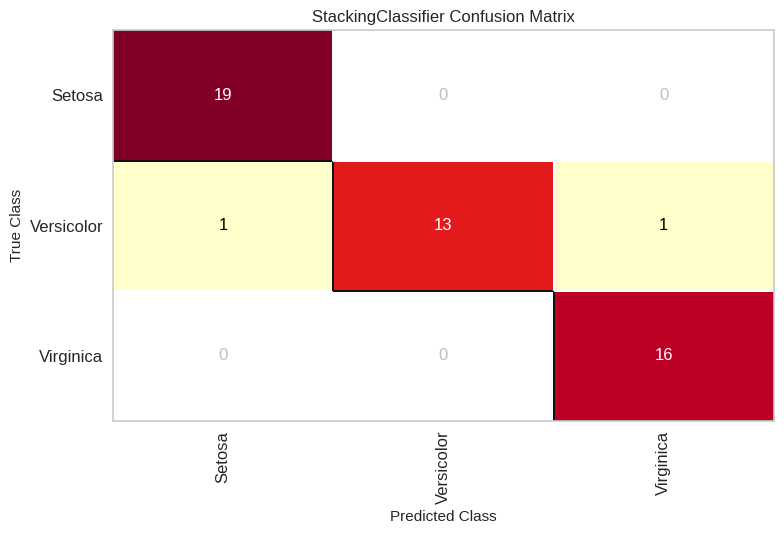

In [84]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

### Class prediction error

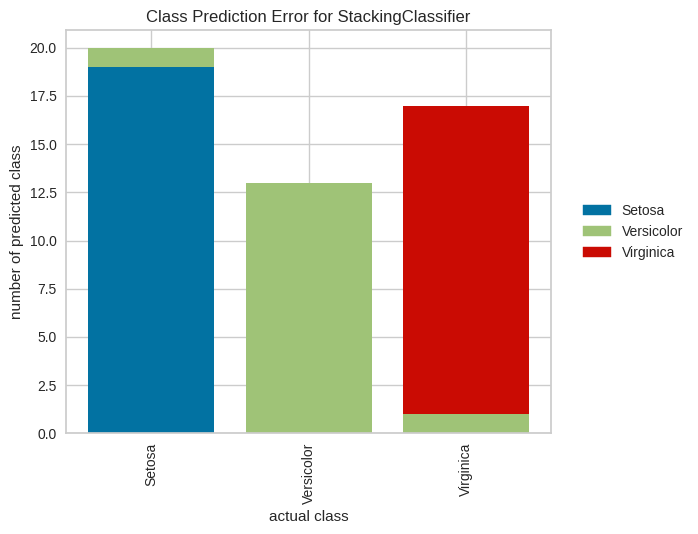

In [85]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

# Model inspection

### Model importance

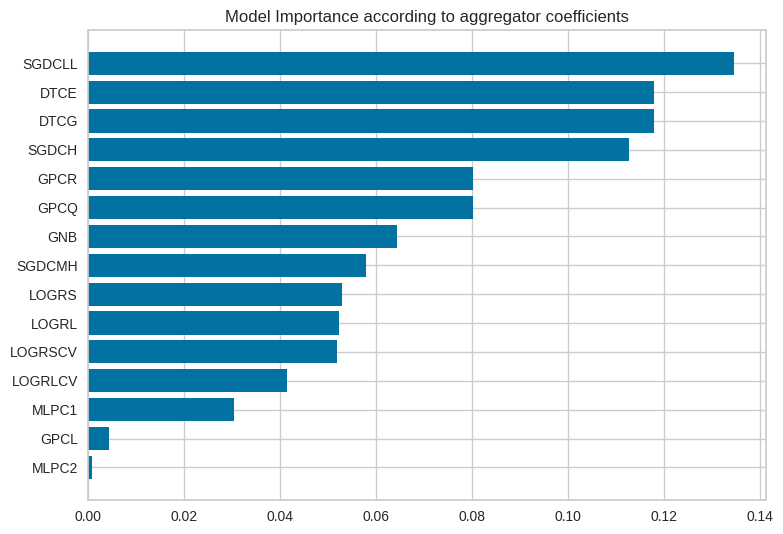

In [86]:
model_imp_0 = plot_model_importance(model, level_1_model)

### Feature permutation importance

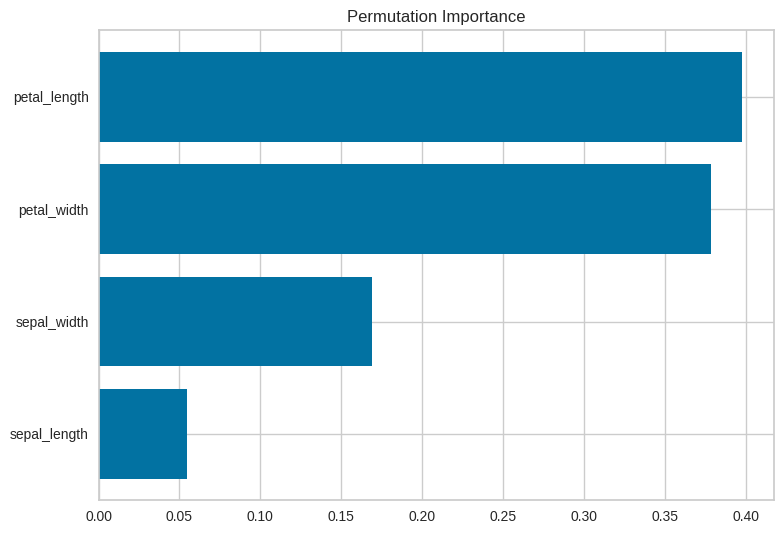

In [87]:
feature_importance_0 = plot_perm_importance(model, X_test, y_test, CPU)

# Level-0 model elimination

#### Filtered Level-0 models

In [88]:
level_0_f = model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)

#### Level-1 model with filtration

In [89]:
level_1 = LogisticRegression(random_state = random_state)

#### Build filtered model

In [90]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

# Filtered Model fitting

In [91]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/e

CPU times: user 121 ms, sys: 2.93 ms, total: 124 ms
Wall time: 7.34 s


StackingClassifier(estimators=[('GPCR',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('iterativeimputer',
                                                                                                                    IterativeImputer(add_indicator=True,
                                                                                                                                     random_state=42)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f353...
                                                                                                                   ('onehotencoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse_output=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f353c6af310>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=1.0))])),
                                                ('sgdclassifier',
                                                 SGDClassifier(loss='log_loss',
                                                               penalty='elasticnet',
                                                               random_state=42))]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

# Filtered Model evaluation

### Filtered Model scoring

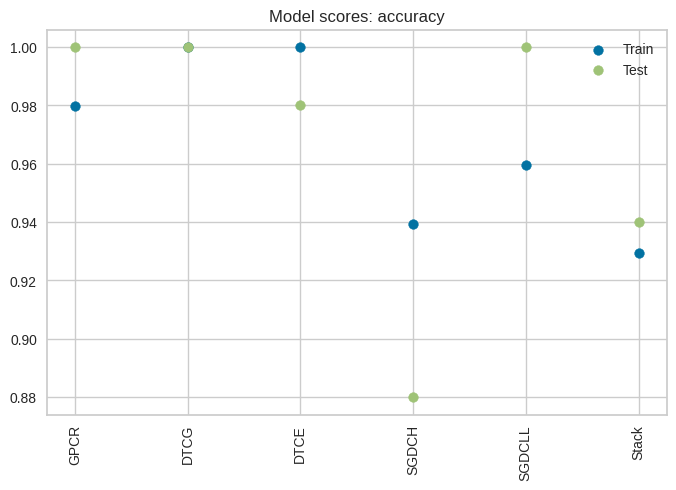

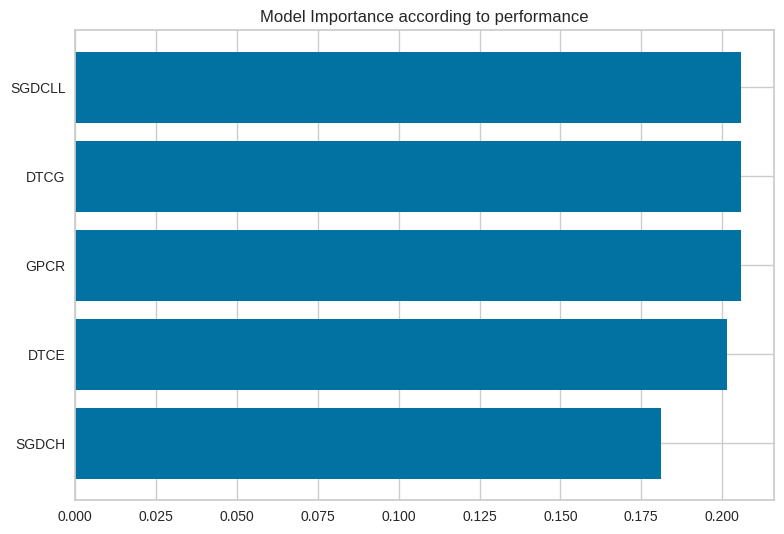

In [92]:
score_stack_1, mod_imp_score_1 = score_stacking(model, X_train, y_train, X_test, y_test)

### Filtered ROC/AUC

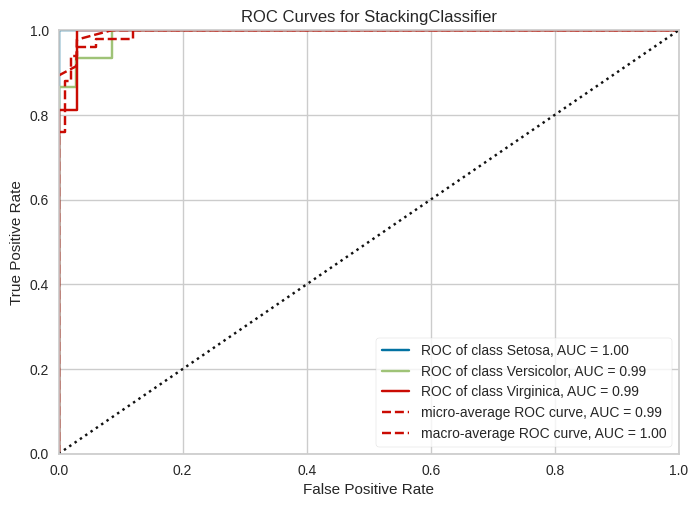

In [93]:
classes = y.unique() 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

### Filtered Classification report

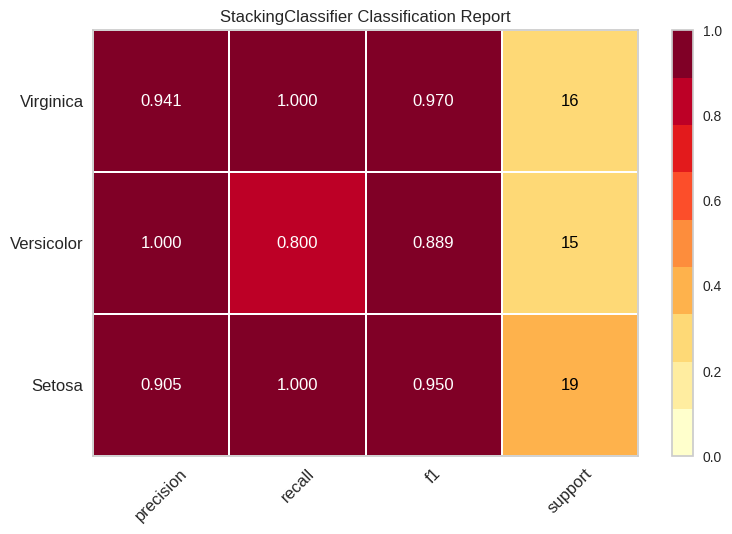

In [94]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

### Filtered Confusion matrix

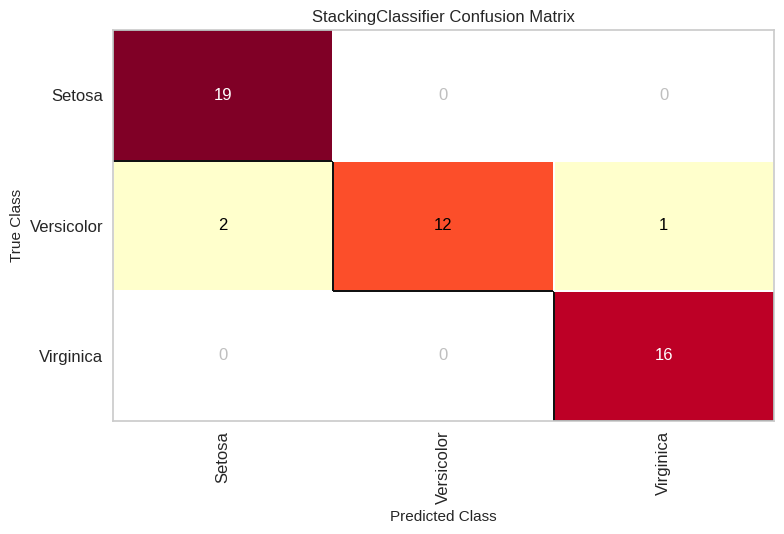

In [95]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

### Filtered Class prediction error

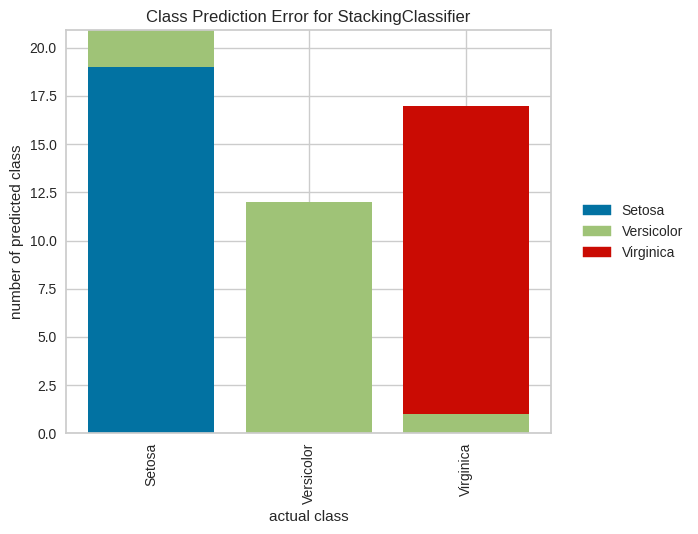

In [96]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

# Filtered Model inspection

### Filtered Model importance

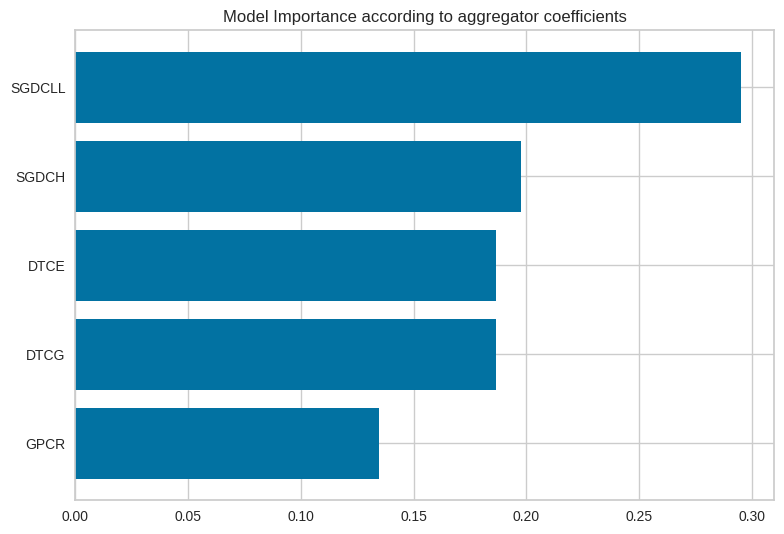

In [97]:
model_imp_1 = plot_model_importance(model, level_1_model)

### Filtered feature permutation importance

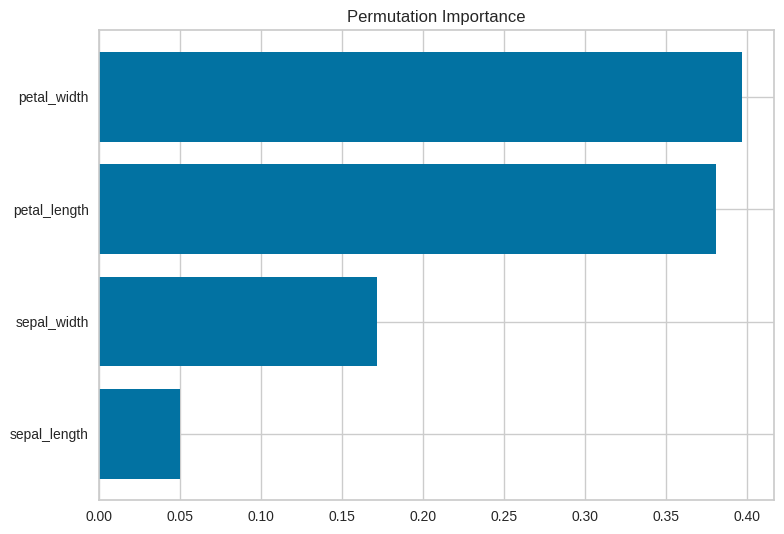

In [98]:
feature_importance_1 = plot_perm_importance(model, X_test, y_test, CPU)

#### Filtered feature elimination

In [99]:
best_feature, worst_feature = feature_filtering(feature_importance_1, threshold_feature)

In [100]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

### Check those columns, they should be dropped

In [101]:
print(dropped_cols)

[]


# Final Model

In [102]:
df = df_copy.drop(dropped_cols, axis=1, errors='ignore')

In [103]:
reduce_schema('column_name', dropped_cols)

# Splitting

In [104]:
y = df[target_col] 

In [105]:
X = df.drop(target_col, axis=1) 

## Dimensions

In [106]:
nb_features = len(X.columns.tolist()) 

In [107]:
nb_targets = len(y.unique()) 

In [108]:
layer_size = nb_features + nb_targets + 2 

## Splitting data in train and test sets 

In [109]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy, undersampling= undersampling, undersampler= undersampler, random_state = random_state) 

## Encoding

In [110]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test)) 

In [111]:
threshold_score = 0.7

#### Build final model

In [112]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

# Final Model fitting

In [113]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/e

CPU times: user 106 ms, sys: 2.36 ms, total: 108 ms
Wall time: 7.35 s


StackingClassifier(estimators=[('GPCR',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('iterativeimputer',
                                                                                                                    IterativeImputer(add_indicator=True,
                                                                                                                                     random_state=42)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f353...
                                                                                                                   ('onehotencoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse_output=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f353c6af310>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=1.0))])),
                                                ('sgdclassifier',
                                                 SGDClassifier(loss='log_loss',
                                                               penalty='elasticnet',
                                                               random_state=42))]))],
                   final_estimator=LogisticRegression(random_state=42),
                   n_jobs=-1)

# Final Model evaluation

### Final Model scoring

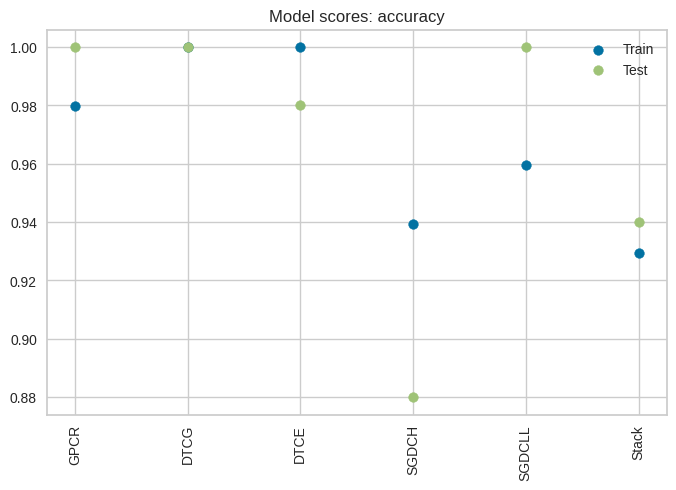

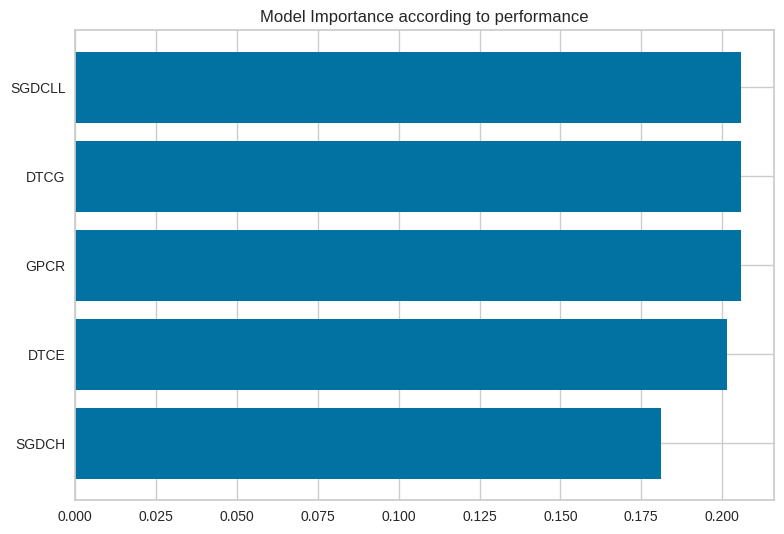

In [114]:
score_stack_2, mod_imp_score_2 = score_stacking(model, X_train, y_train, X_test, y_test)

### Final feature permutation importance

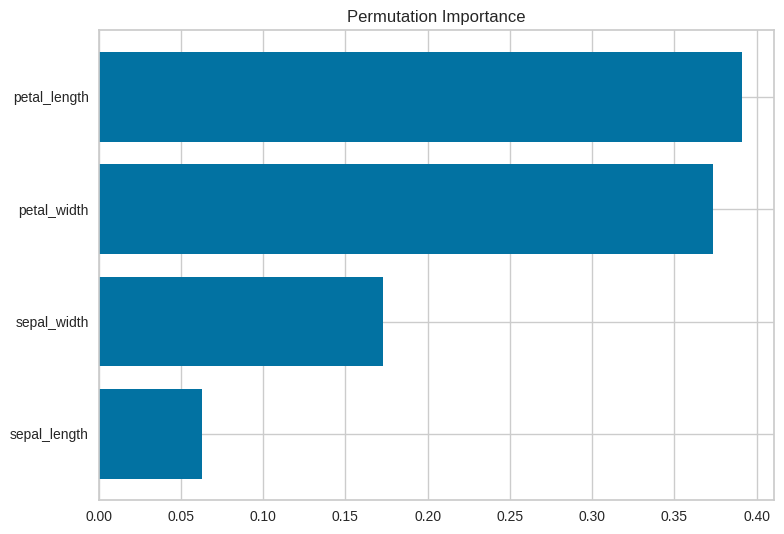

In [115]:
feature_importance_2 = feature_importance = plot_perm_importance(model, X_test, y_test, CPU)

#### Final feature elimination

In [116]:
best_feature, worst_feature = feature_filtering(feature_importance_2, threshold_feature)

### Final ROC/AUC

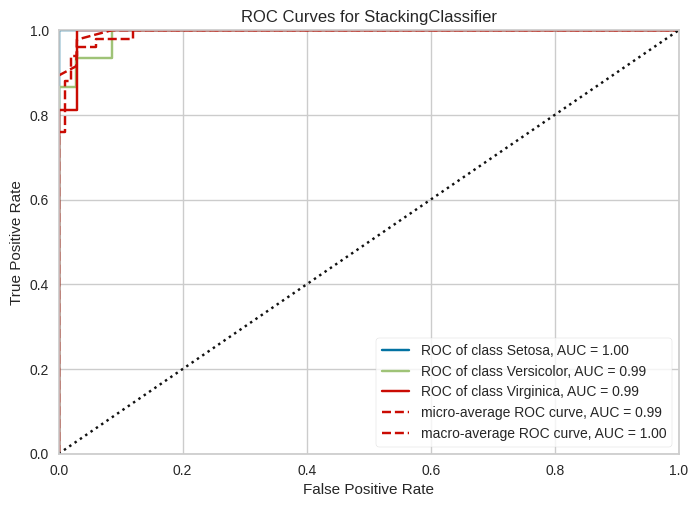

In [117]:
classes = y.unique() 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

### Final Classification report

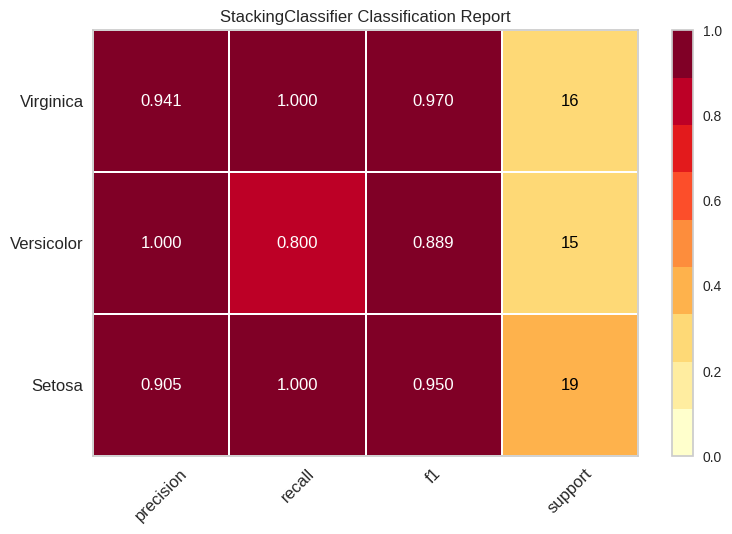

In [118]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

### Final Confusion matrix

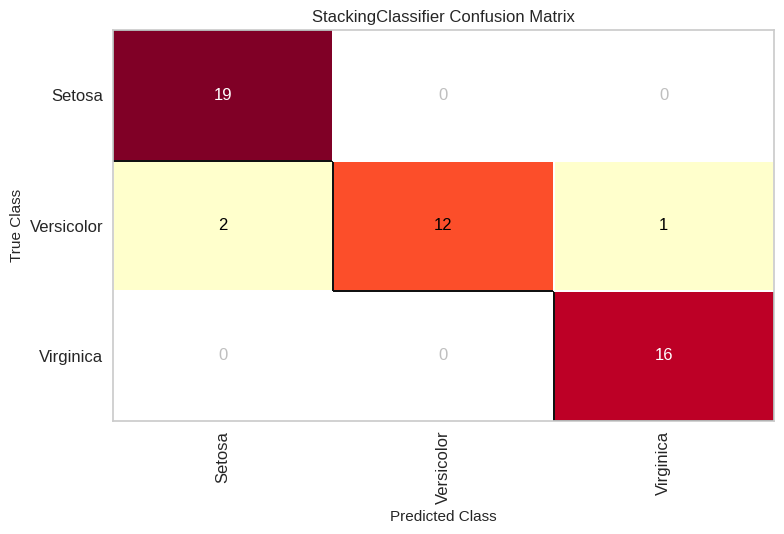

In [119]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

### Final Class prediction error

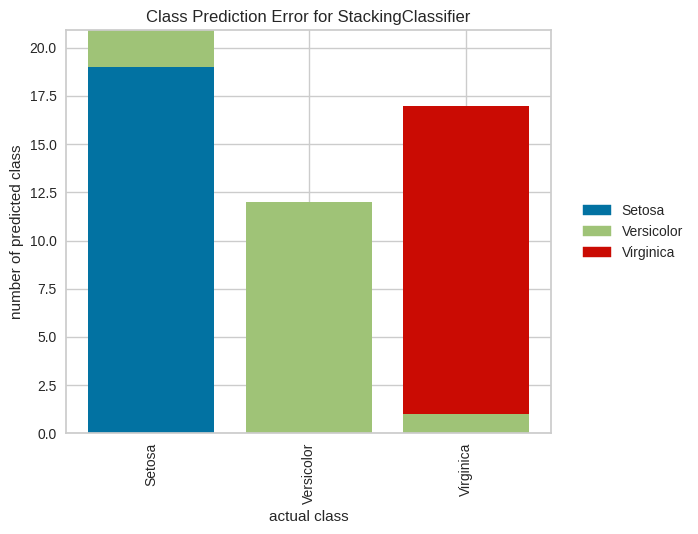

In [120]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

# Final Model inspection

### Final Model importance

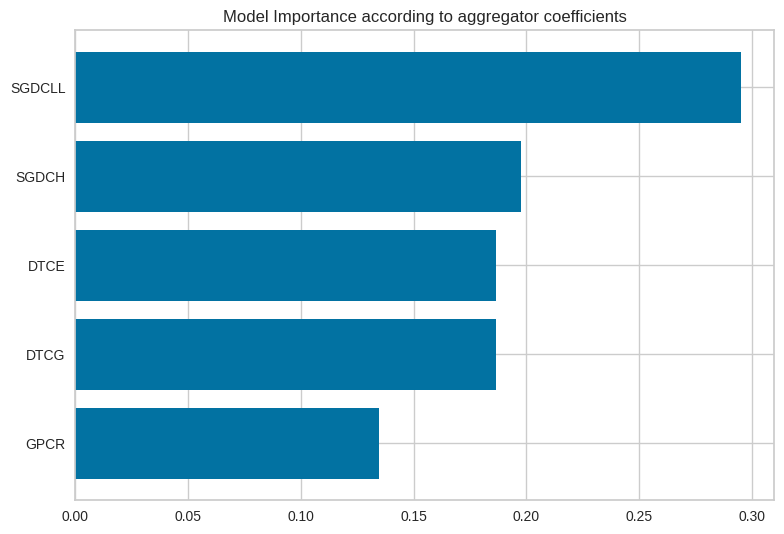

In [121]:
model_imp_2 = plot_model_importance(model, level_1_model)

### Final Feature permutation importance

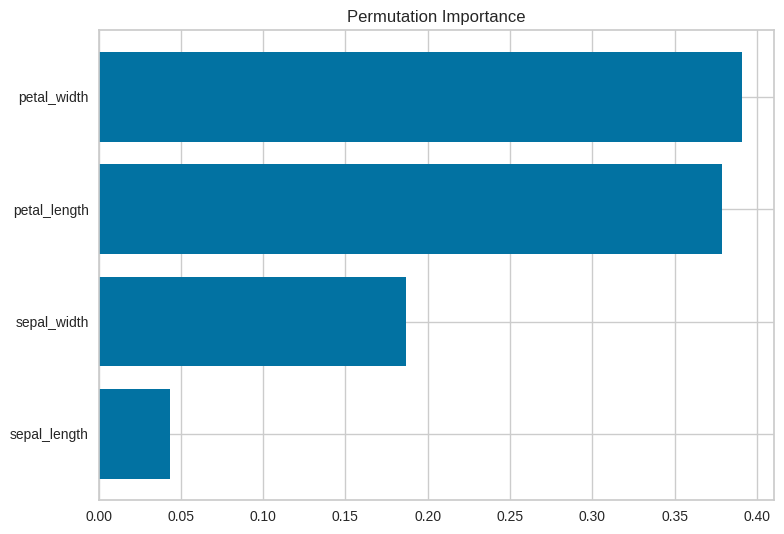

array([['sepal_length', 0.04316546762589923],
       ['sepal_width', 0.18705035971223016],
       ['petal_length', 0.3788968824940048],
       ['petal_width', 0.3908872901678658]], dtype=object)

In [122]:
plot_perm_importance(model, X_test, y_test, CPU)

### Final Partial Dependence & Individual Conditional Expectation 

In [123]:
pd_ice_plot(model=model, X=X_test, feature=X_test.columns.tolist(), CPU=CPU, target_encoder=target_encoder)

interactive(children=(Dropdown(description='feature', options=('sepal_length', 'sepal_width', 'petal_length', …

# Deployment

## Save your model

In [124]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

## Generate your server

In [125]:
fastapi_server(model, 'model.sav', X, y, FastAPI_port)

## [Test your API](./server.ipynb)

## Docker

In [126]:
dockerize(name, model, model_name, X, y, Docker_port)

NotADirectoryError: [Errno 20] Not a directory: '/home/fifi/Documents/ezstacking/iris'